In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.integrate

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
class ScopeChannel:
    def __init__(self, shot, scope, channel):
        fn="//LINNA/scopes/scope"+scope+"_"+shot
        self.time=np.loadtxt(fn+"time")
        self.data=np.loadtxt(fn+"_"+channel)[1:]
        
class Bdot_pair:
    def __init__(self, shot, scope="1", bdot1='A1', bdot2='A2'):
        self.shot=shot
        #bdot signals 1 and 2
        self.bd1=ScopeChannel(shot, scope, bdot1)
        self.bd2=ScopeChannel(shot, scope, bdot2)
    def truncate(self, threshold=1.0, window=1000, cal=[1,1]):
        #find the start of the current pulse with a  high threshold
        sig1=self.bd1.data
        start=np.nonzero(abs(sig1)>threshold)[0][0]
        #back off a bit so we can see the zero signal
        self.start=start-100
        #reverse the array to find the end of the current pulse with a high threshold
        #end=np.nonzero(abs(sig1[::-1])>threshold)[0][0]
        #back off a bit so we can see the zero signal
        #end=end-100
        #self.end=sig1.size-end #find the index in the non-reversed array
        self.time=self.bd1.time[self.start:self.start+window]
        self.bd1_tr=self.bd1.data[self.start:self.start+window]*cal[0]
        self.bd2_tr=self.bd2.data[self.start:self.start+window]*cal[1]
        self.add()
        self.subtract()
    def add(self):
        self.estat=(self.bd1_tr+self.bd2_tr)/2.0      
    def subtract(self):
        self.dBdt=(self.bd1_tr-self.bd2_tr)/2.0
    def integrate(self):
        self.B=scipy.integrate.cumtrapz(self.dBdt,self.time)/1e9
        self.time_B=self.time[:-1]
    def plot(self, data, ax=None):
        if ax is None:
            fig, ax=plt.subplots()
        if data is "raw":
            t=self.bd1.time
            d1=self.bd1.data
            d2=self.bd2.data
            l1='Bdot 1, raw'
            l2='Bdot 2, raw'
        if data is "tr":
            t=self.time
            d1=self.bd1_tr
            d2=self.bd2_tr
            l1='Bdot 1, truncated'
            l2='Bdot 2, truncated'
        if data is "sum_diff":
            t=self.time
            d1=self.add
            d2=self.sub
            l1='Electrostatic'
            l2='dB/dt'
        if data is "B":
            t=self.time
            d1=self.add
            d2=None
            l1='Magnetic Field'
        ax.plot(t, d1, label=l1)
        if d2 is not None:
            ax.plot(t, d2, label=l2)
        ax.set_xti
        ax.legend()
        
class Bdots:
    def __init__(self, shot, pairs, attenuations, diameters, scope="1"):
        self.shot=shot
        self.bd={}
        for k, v in  pairs.items():
            bd1=v+"1"
            bd2=v+"2"
            area=(1e-3*diameters[k]/2.0)**2*np.pi
            calibration=[attenuations[bd1]/area, attenuations[bd2]/area]
            self.bd[k]=Bdot_pair(shot, scope, bdot1=bd1, bdot2=bd2)
            self.bd[k].truncate(cal=calibration)
            self.bd[k].integrate()
    def plot(self, name, data):
        self.bd[name].plot(data)
    def plot_raw(self, name):
        self.bd[name].plot_raw()
    def plot_estat_dBdt(self, name):
        self.bd[name].plot_estat_dBdt()
    def plot_B(self, name):
        self.bd[name].plot_B()
            
scope_attenuation={"A1":10, "A2":10,"B1":2, "B2":2, "C1":10, "C2":10, "D1":1, "D2":1 }
Bdot_diameters={"T56":0.5, "T78": 0.5, "G12": 1.0}

In [3]:
b=Bdots("s0222_16", {"T56":"B", "T78":"D", "G12": "A"}, attenuations=scope_attenuation, diameters=Bdot_diameters)

In [5]:
b.plot_B("T56")
b.plot_B("T78")
b.plot_B("G12")

AttributeError: 'Bdot_pair' object has no attribute 'plot_B'

## s0218_16

In [4]:
T56=Bdot_pair("s0218_16", bdot1="B1", bdot2="B2")
b=T56
b.plot_raw()

AttributeError: 'Bdot_pair' object has no attribute 'plot_raw'

<IPython.core.display.Javascript object>


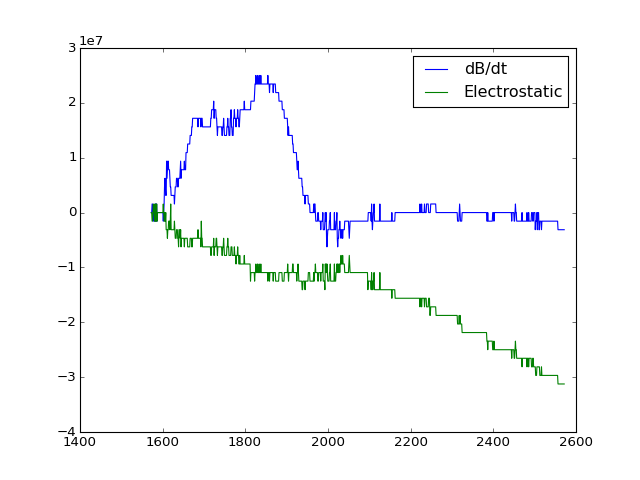

<IPython.core.display.Javascript object>


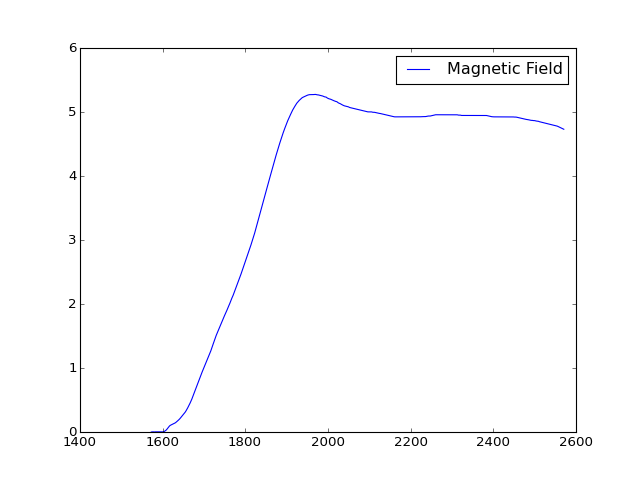

In [39]:
b.truncate(cal=[2/0.2e-6, 2/0.2e-6])
b.plot_estat_dBdt()
b.integrate()
b.plot_B()

<IPython.core.display.Javascript object>


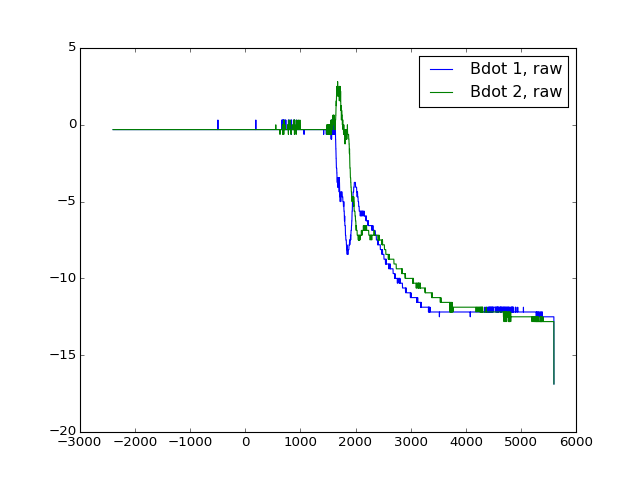

In [40]:
T78=Bdot_pair("s0218_16", bdot1="D1", bdot2="D2")
b=T78
b.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


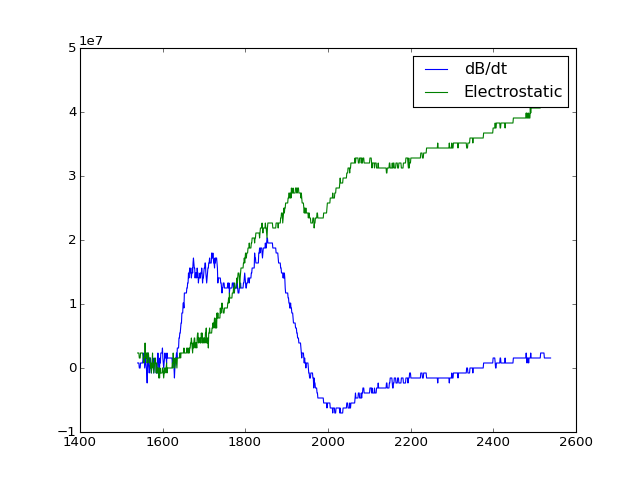

<IPython.core.display.Javascript object>


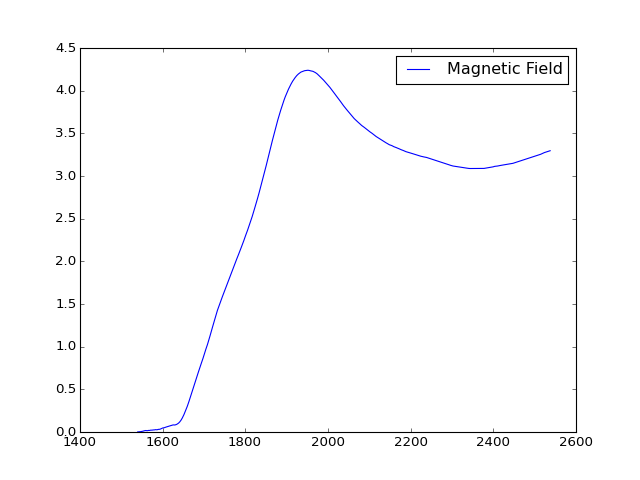

In [42]:
b.truncate(cal=[-1/0.2e-6, -1/0.2e-6])
b.plot_estat_dBdt()
b.integrate()
b.plot_B()

## s0219_16

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


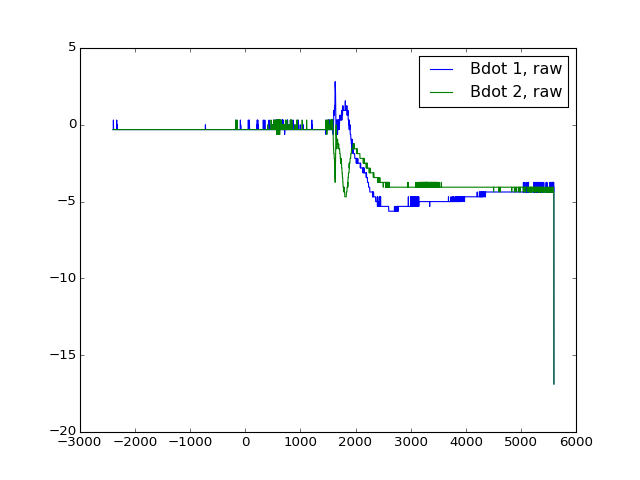

In [43]:
T56=Bdot_pair("s0219_16", bdot1="B1", bdot2="B2")
b=T56
b.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


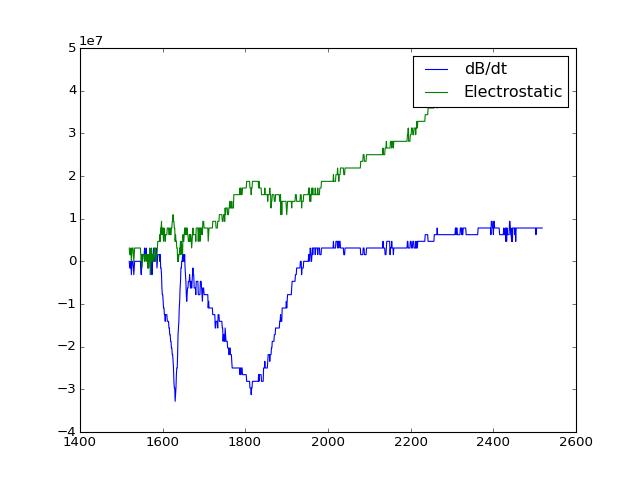

<IPython.core.display.Javascript object>


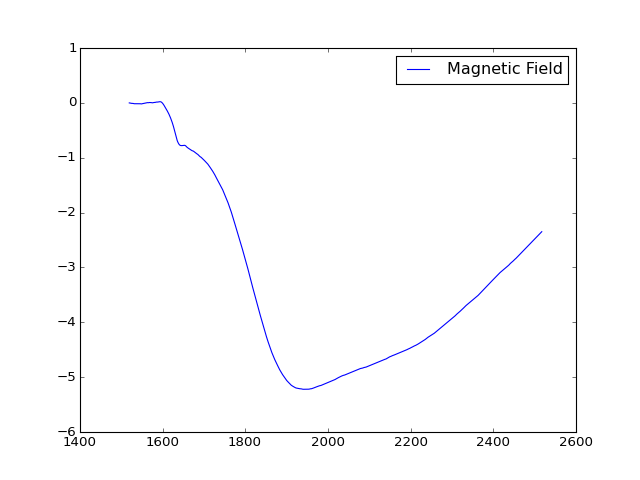

In [46]:
b.truncate(cal=[-2/0.2e-6, -2/0.2e-6])
b.plot_estat_dBdt()
b.integrate()
b.plot_B()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


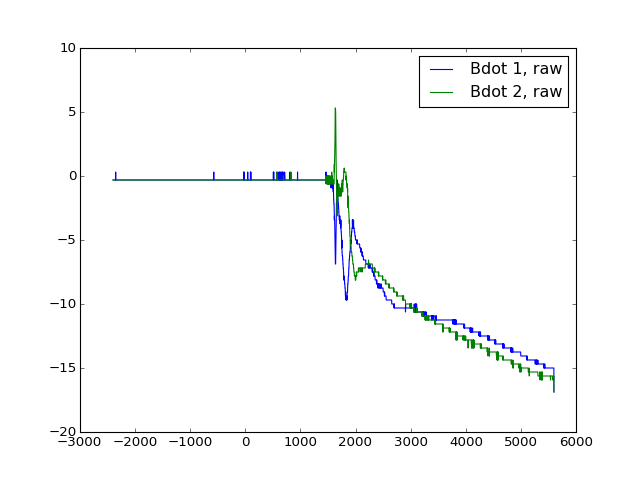

<IPython.core.display.Javascript object>


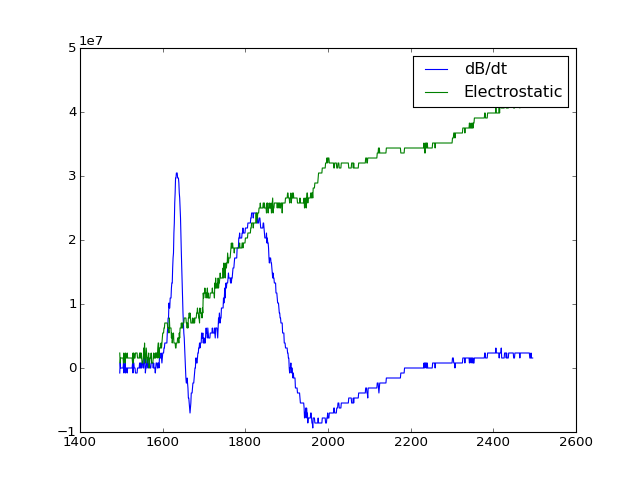

<IPython.core.display.Javascript object>


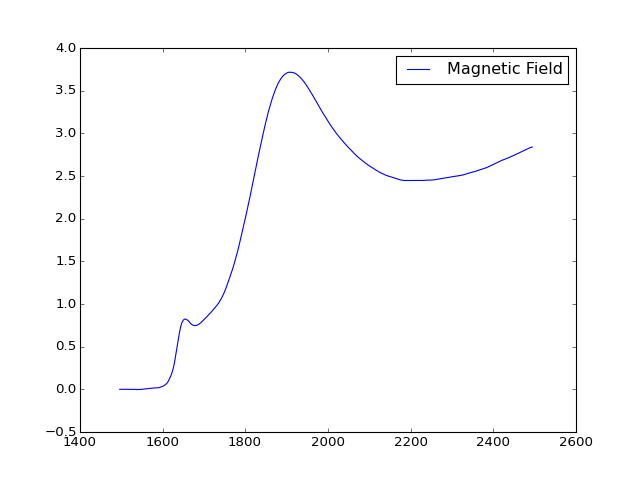

In [48]:
T78=Bdot_pair("s0219_16", bdot1="D1", bdot2="D2")
b=T78
b.plot_raw()
b.truncate(cal=[-1/0.2e-6, -1/0.2e-6])
b.plot_estat_dBdt()
b.integrate()
b.plot_B()

In [71]:
bd.truncate(signal=5,threshold=1,calibration=cal)
bd.add()
bd.subtract()

<IPython.core.display.Javascript object>


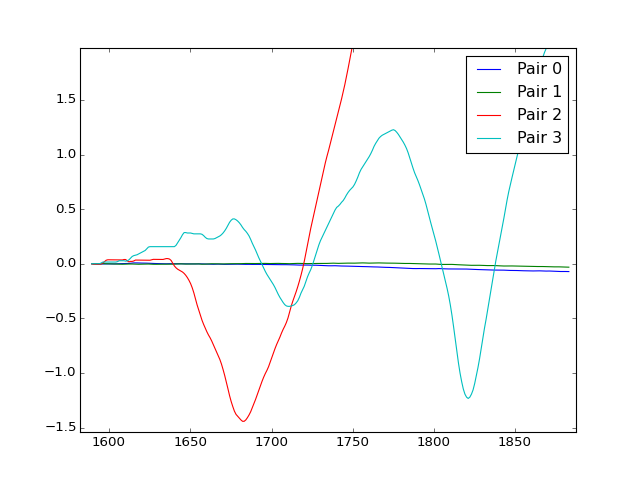

In [72]:
bd.integrate()
bd.plot_B()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


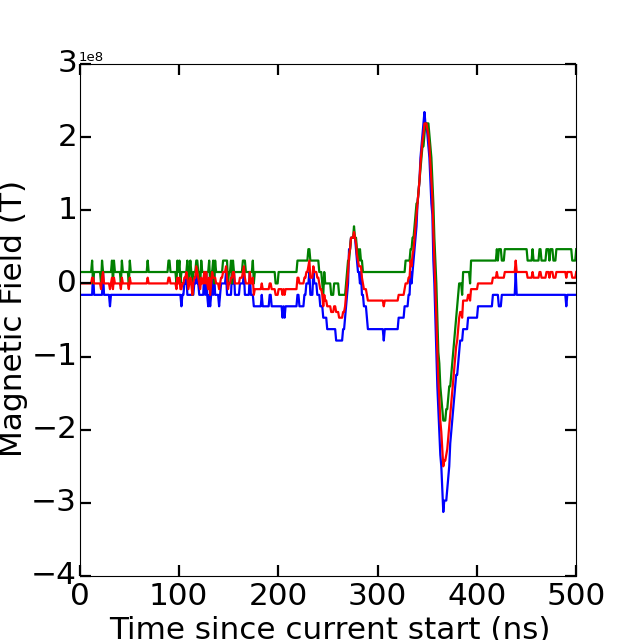

In [45]:
fig, ax=plt.subplots(figsize=(8,8))
ax.plot(bd.time-1530, bd.bdots_tr[4], lw=2)
ax.plot(bd.time-1530, -bd.bdots_tr[5], lw=2)
ax.plot(bd.time-1530, bd.dBdt[2], lw=2)
#ax.plot(bd.time_B-1530, bd.B[1], lw=2,label='Left pair')
ax.set_xlim([0,500])
#ax.set_ylim([-1,8])
ax.set_xlabel('Time since current start (ns)', fontsize=28)
ax.set_ylabel('Magnetic Field (T)', fontsize=28)

ax.tick_params(labelsize=28, pad=5, length=10, width=2)

#ax.legend(fontsize=20)


In [43]:
bd.integrate()

In [113]:
bd.subtract()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


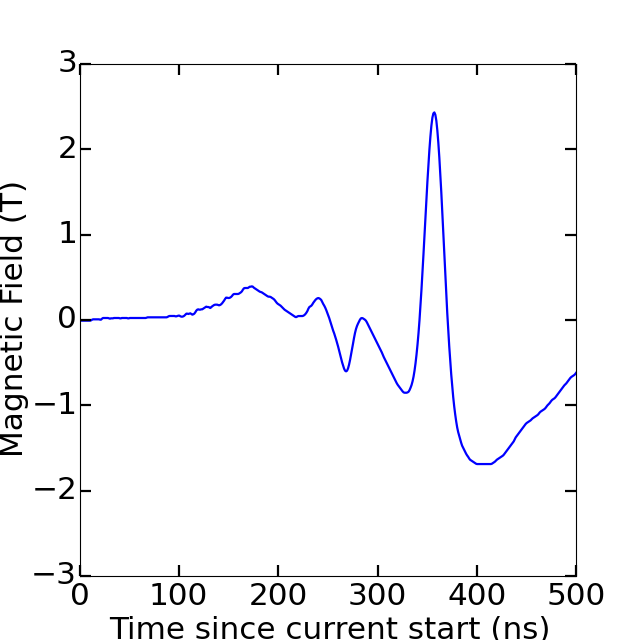

In [44]:
fig, ax=plt.subplots(figsize=(8,8))
ax.plot(bd.time_B-1530, bd.B[2], lw=2)
ax.set_xlim([0,500])
ax.set_ylim([-3,3])
ax.set_xlabel('Time since current start (ns)', fontsize=28)
ax.set_ylabel('Magnetic Field (T)', fontsize=28)

ax.tick_params(labelsize=28, pad=5, length=10, width=2)

#ax.legend(fontsize=20)

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


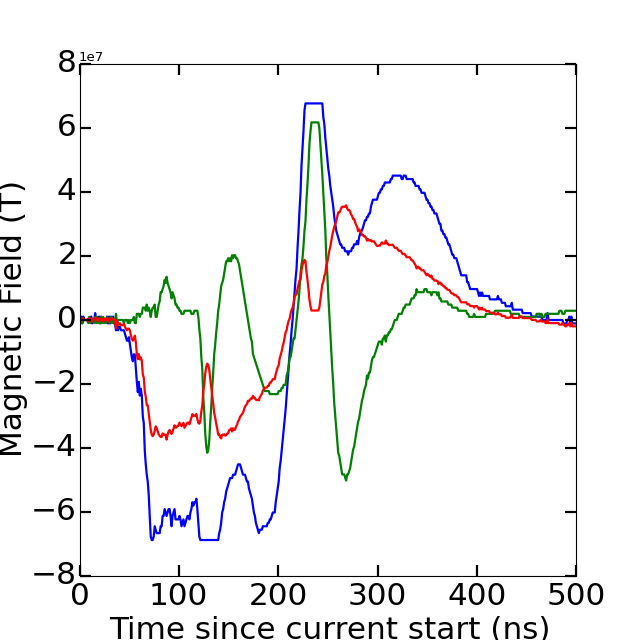

In [208]:
fig, ax=plt.subplots(figsize=(8,8))
ax.plot(bd.time-1530, bd.bdots_tr[0], lw=2)
ax.plot(bd.time-1530, -bd.bdots_tr[1], lw=2)
ax.plot(bd.time-1530, (bd.bdots_tr[0]+bd.bdots_tr[1])/2.0, lw=2)

ax.set_xlim([0,500])
#ax.set_ylim([-1,8])
ax.set_xlabel('Time since current start (ns)', fontsize=28)
ax.set_ylabel('Magnetic Field (T)', fontsize=28)

ax.tick_params(labelsize=28, pad=5, length=10, width=2)



## s0125B16

In [93]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0125B16 C RECONNECTION 12 FRAME + BDots"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0125B16 C RECONNECTION 12 FRAME + BDots


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


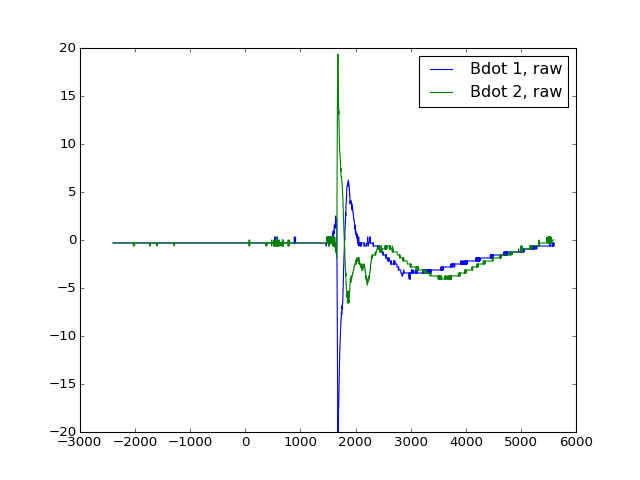

In [122]:
cal=np.array([1/0.2, 1/0.2])*1e6
bd=Bdot_pair("s0125B16 bdots.dat", bdot1='c1', bdot2='c2')
bd.plot_raw()

In [123]:
bd.truncate(threshold=1,calibration=cal)
bd.add()
bd.subtract()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


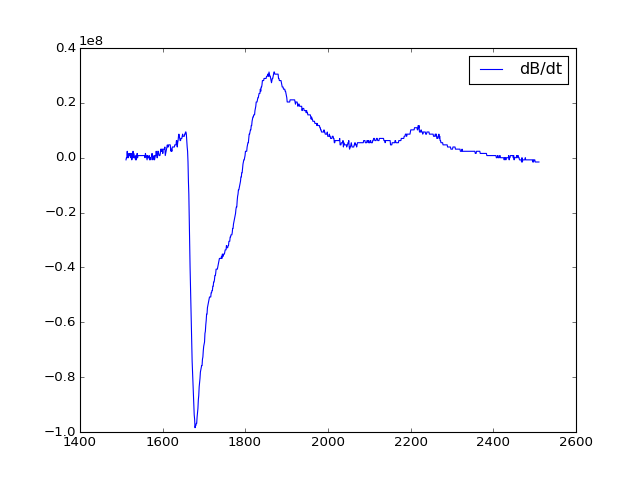

<IPython.core.display.Javascript object>


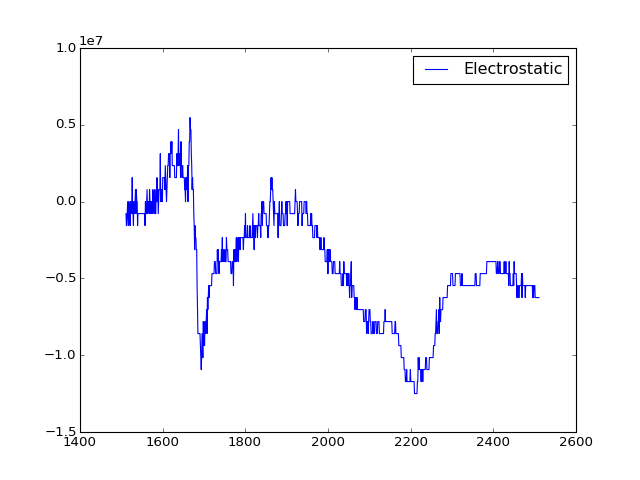

In [126]:
bd.plot_dBdt()
bd.plot_estat()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


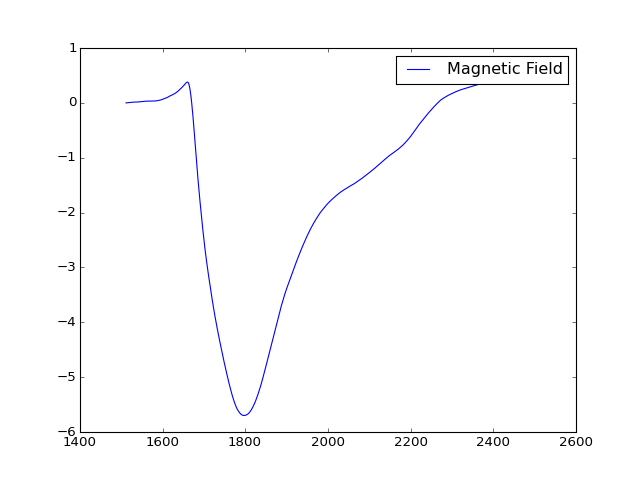

In [125]:
bd.integrate()
bd.plot_B()

## s0125_16

In [133]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0125_16 C RECONNECTION 12 FRAME"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0125_16 C RECONNECTION 12 FRAME


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


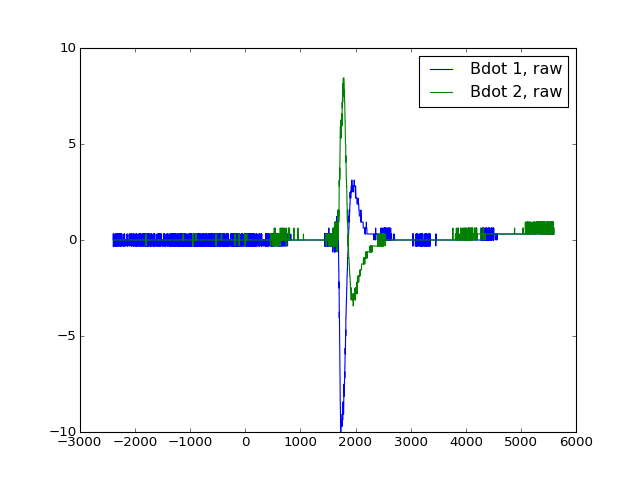

In [134]:
cal=np.array([10.8/np.pi, 10.6/np.pi])*1e6
bd=Bdot_pair("s0125_16 bdots.dat", bdot1='a1', bdot2='a2')
bd.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


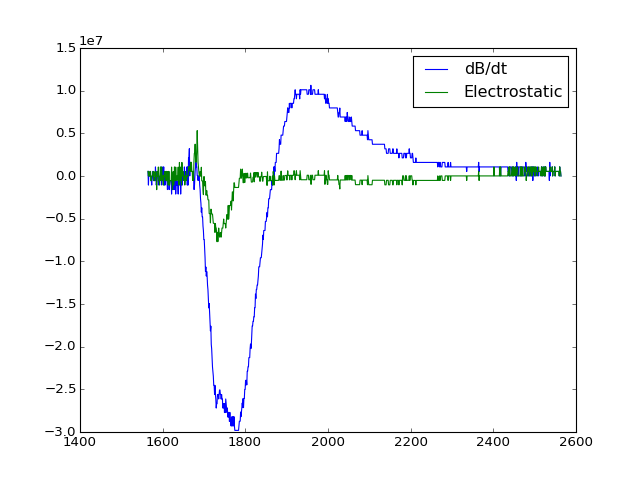

In [135]:
bd.truncate(threshold=1,calibration=cal)
bd.add()
bd.subtract()
bd.plot_estat_dBdt()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


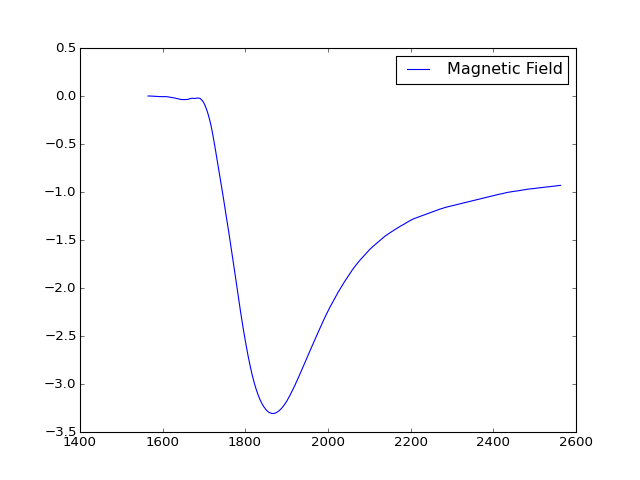

In [136]:
bd.integrate()
bd.plot_B()

In [ ]:
top_hat=np.zeros_like(bd.time)
np.convolve

## s0205_16

In [3]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\Others"

C:\Users\jdavies\Google Drive\MAGPIE\data\Others


<IPython.core.display.Javascript object>


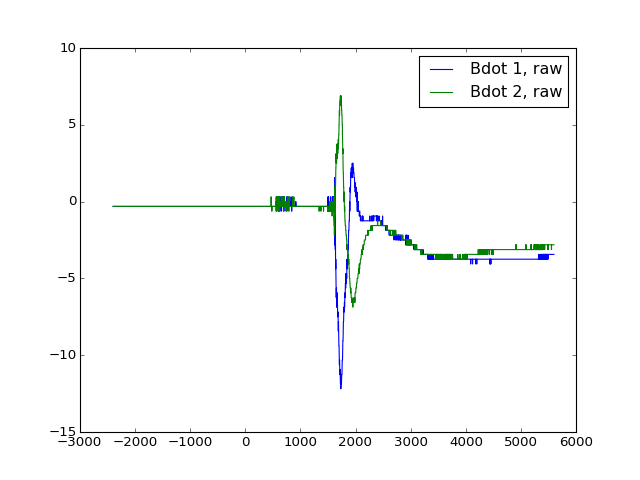

In [4]:
cal=np.array([1/0.2, 1/0.2])*1e6
bd=Bdot_pair("s0205_16 bdots.dat", bdot1='b1', bdot2='b2')
bd.plot_raw()

<IPython.core.display.Javascript object>


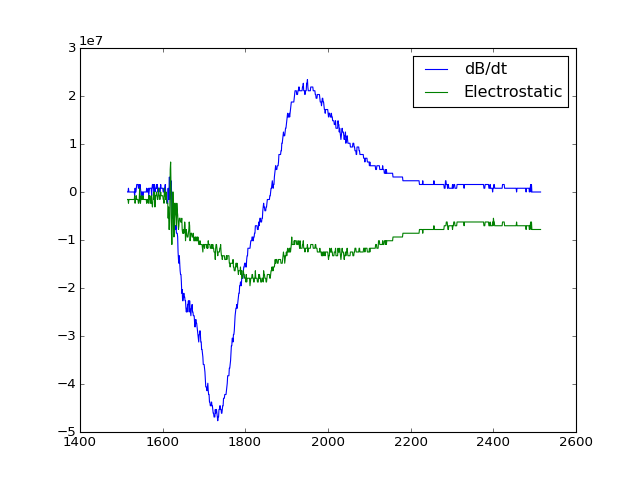

In [5]:
bd.truncate(threshold=1,calibration=cal)
bd.add()
bd.subtract()
bd.plot_estat_dBdt()

<IPython.core.display.Javascript object>


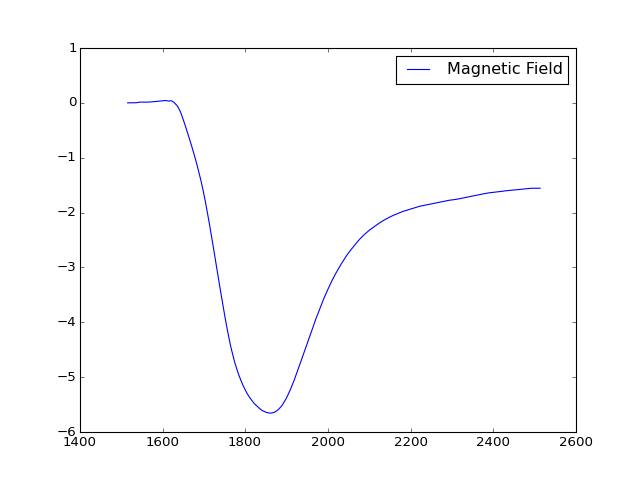

In [6]:
bd.integrate()
bd.plot_B()

## s0210_16

In [4]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\Others"

C:\Users\jdavies\Google Drive\MAGPIE\data\Others


<IPython.core.display.Javascript object>


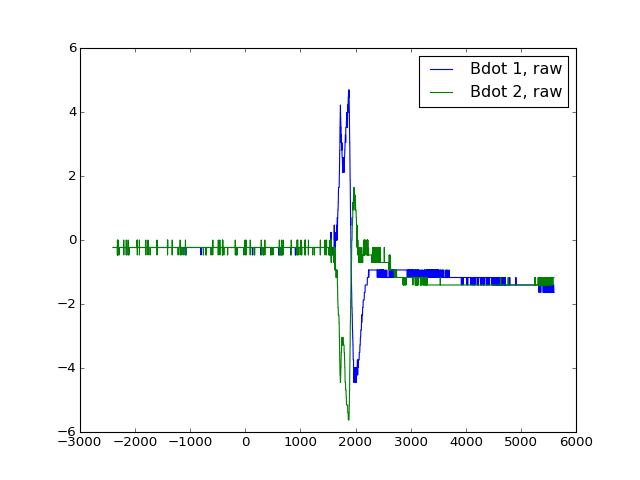

In [11]:
cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6
bd=Bdot_pair("s0210_16 bdots.dat", bdot1='c1', bdot2='c2')
bd.plot_raw()

<IPython.core.display.Javascript object>


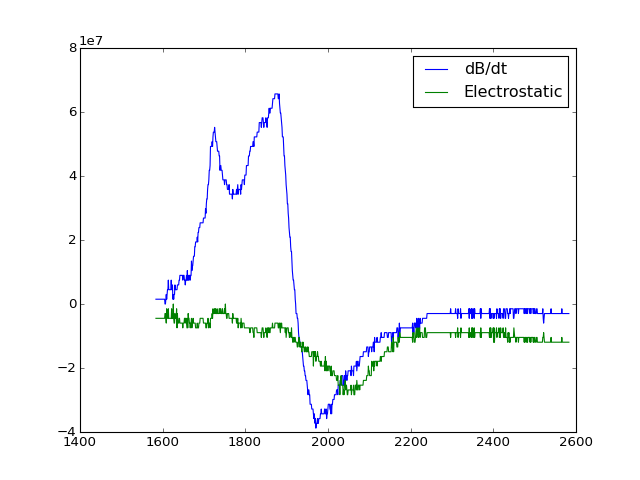

<IPython.core.display.Javascript object>


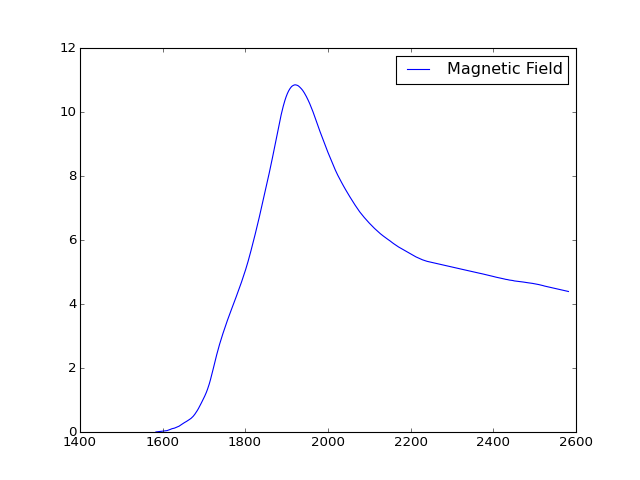

In [14]:
bd.truncate(threshold=1,calibration=cal)
bd.add()
bd.subtract()
bd.plot_estat_dBdt()
bd.integrate()
bd.plot_B()

<IPython.core.display.Javascript object>


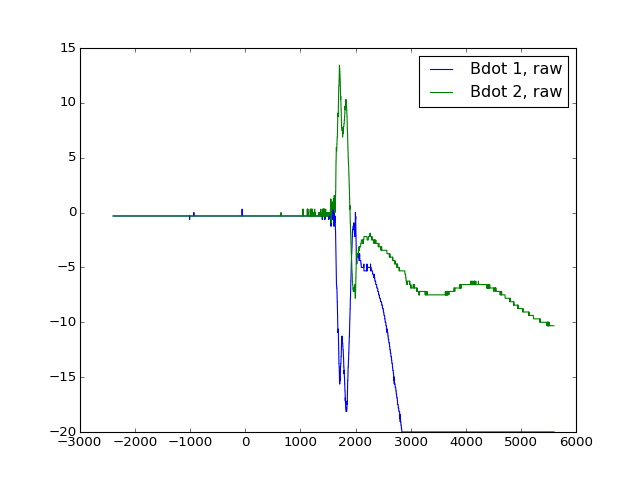

In [18]:
cal=-np.array([1/(0.2), 1/(0.2)])*1e6
bd=Bdot_pair("s0210_16 bdots.dat", bdot1='b1', bdot2='b2')
bd.plot_raw()

<IPython.core.display.Javascript object>


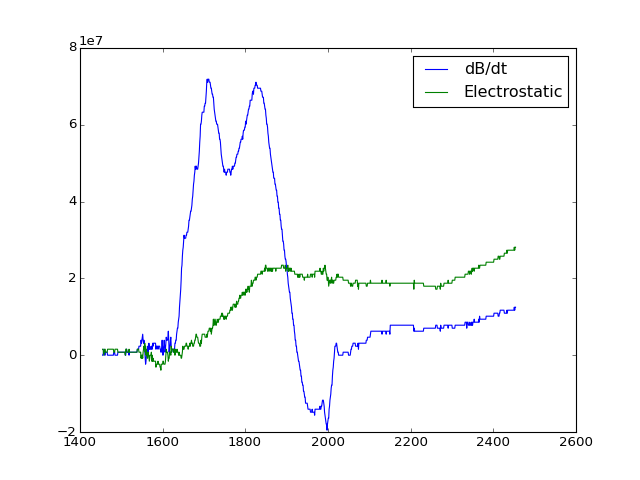

<IPython.core.display.Javascript object>


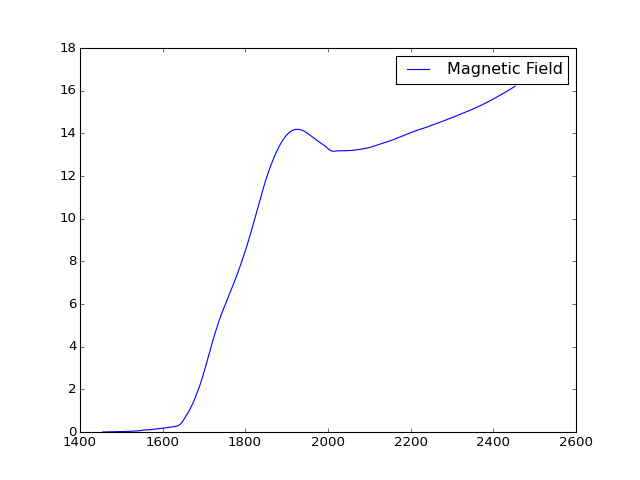

In [19]:
bd.truncate(threshold=1,calibration=cal)
bd.add()
bd.subtract()
bd.plot_estat_dBdt()
bd.integrate()
bd.plot_B()

## s0211_16

In [23]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\Others"

C:\Users\jdavies\Google Drive\MAGPIE\data\Others


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


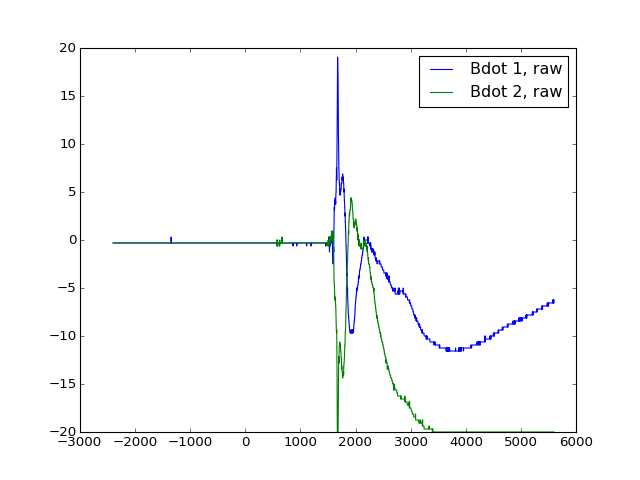

In [77]:
#cal=-np.array([21/np.pi, 20/np.pi])*1e6 #a1 and a2
cal=-np.array([1/0.2, 1/0.2])*1e6 #b1 and b2 and d1 and d2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6 #c1 and c2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6
bd=Bdot_pair("s0211_16 bdots.dat", bdot1='d1', bdot2='d2')
bd.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


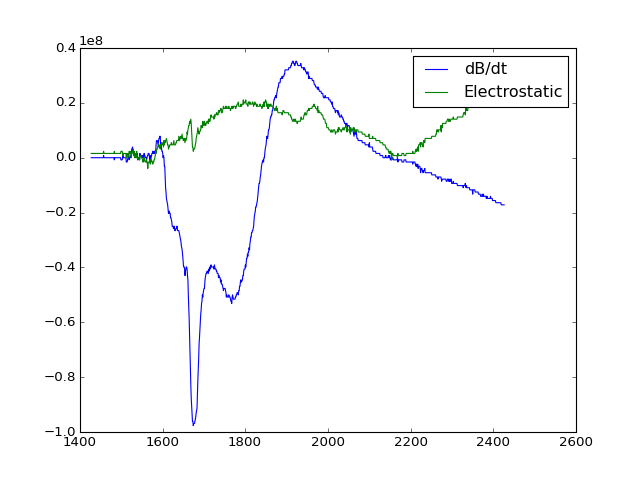

<IPython.core.display.Javascript object>


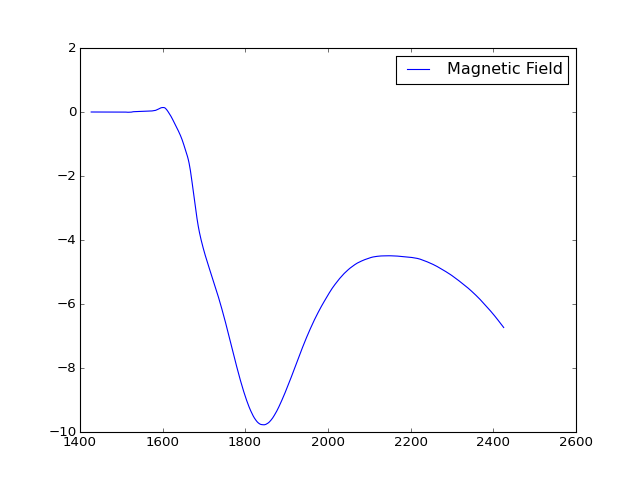

In [78]:
bd.truncate(threshold=1,calibration=cal)
bd.add()
bd.subtract()
bd.plot_estat_dBdt()
bd.integrate()
bd.plot_B()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


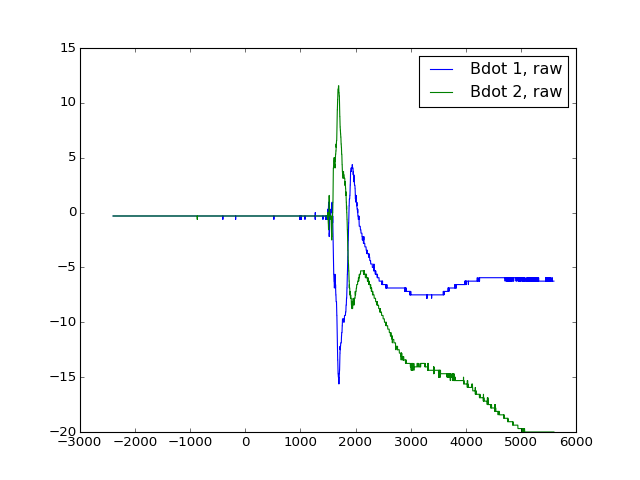

In [61]:
#cal=-np.array([21/np.pi, 20/np.pi])*1e6 #a1 and a2
cal=-np.array([1/0.2, 1/0.2])*1e6 #b1 and b2 and d1 and d2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6 #c1 and c2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6
bd2=Bdot_pair("s0211_16 bdots.dat", bdot1='b1', bdot2='b2')
bd2.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


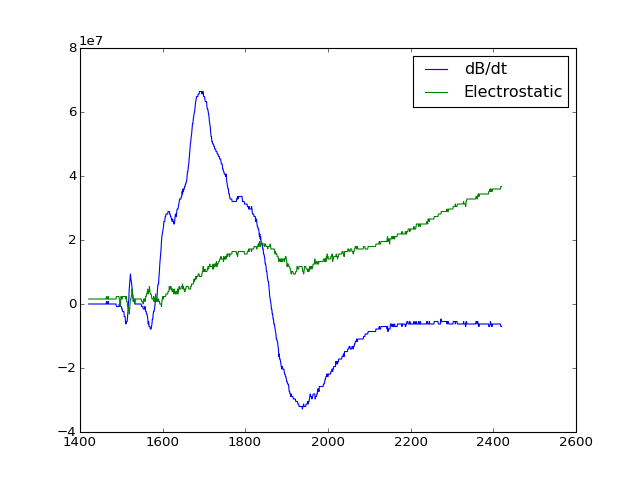

<IPython.core.display.Javascript object>


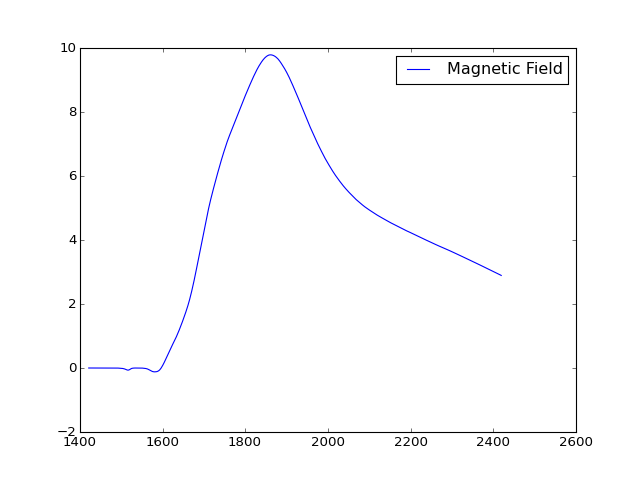

In [62]:
bd2.truncate(threshold=1,calibration=cal)
bd2.add()
bd2.subtract()
bd2.plot_estat_dBdt()
bd2.integrate()
bd2.plot_B()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


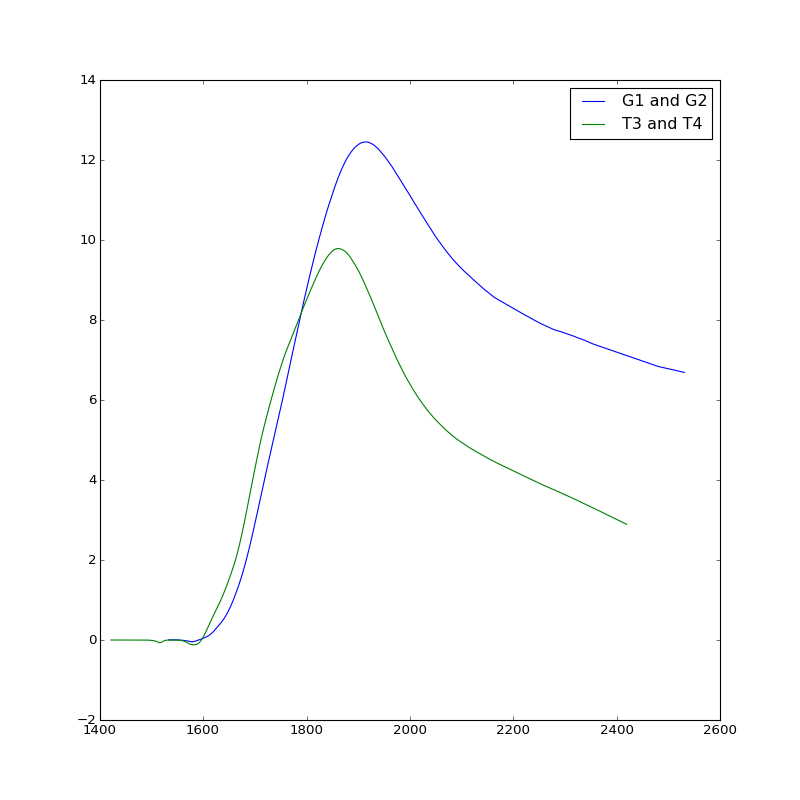

In [63]:
fig, ax=plt.subplots(figsize=(10,10))
ax.plot(bd.time_B,bd.B, label='G1 and G2')
ax.plot(bd2.time_B,bd2.B, label='T3 and T4')
ax.legend()

## s0614_13

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


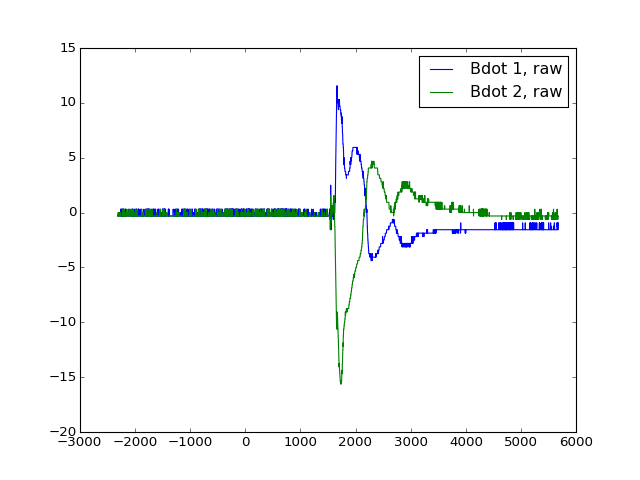

In [69]:
#cal=-np.array([20/2.7, 20/2.7])*1e6 #a1 and a2
cal=np.array([10/3.1, 10/3.1])*1e6 #b1 and b2 and d1 and d2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6 #c1 and c2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6
bd3=Bdot_pair("s0614_13 bdots.dat", bdot1='b1', bdot2='b2')
bd3.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


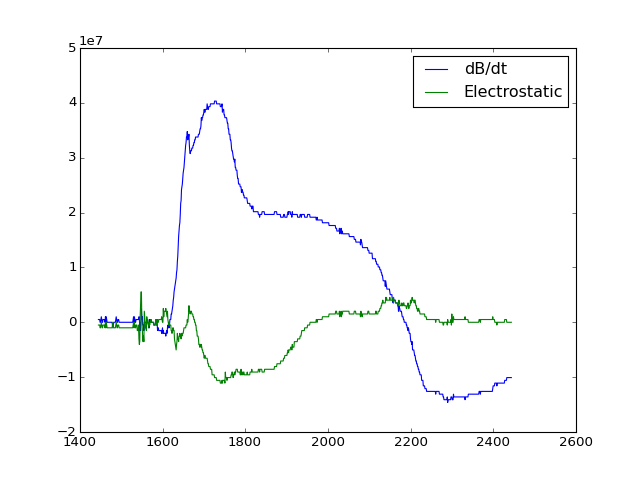

<IPython.core.display.Javascript object>


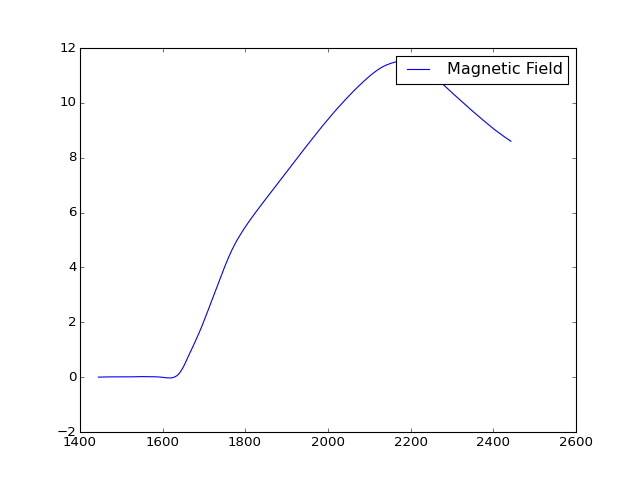

In [70]:
bd3.truncate(threshold=1,calibration=cal)
bd3.add()
bd3.subtract()
bd3.plot_estat_dBdt()
bd3.integrate()
bd3.plot_B()

## s0724_13

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


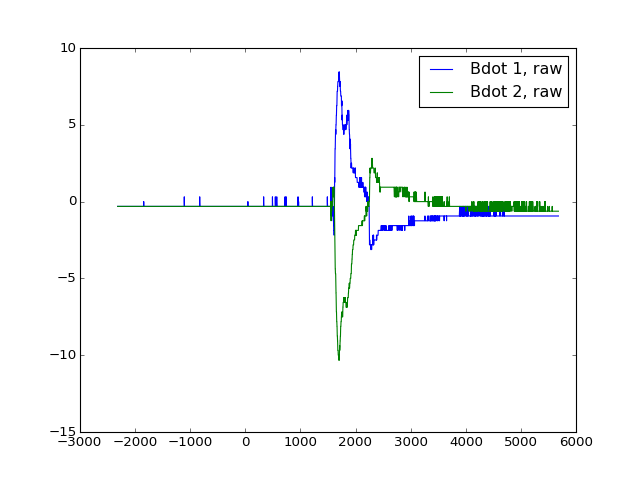

In [72]:
#cal=-np.array([20/2.7, 20/2.7])*1e6 #a1 and a2
cal=np.array([10/3.1, 10/3.1])*1e6 #b1 and b2 and d1 and d2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6 #c1 and c2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6
bd3=Bdot_pair("s0724_13 bdots.dat", bdot1='b1', bdot2='b2')
bd3.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


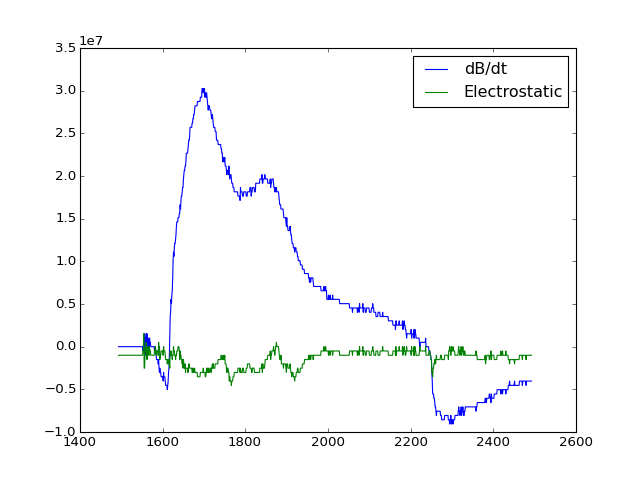

<IPython.core.display.Javascript object>


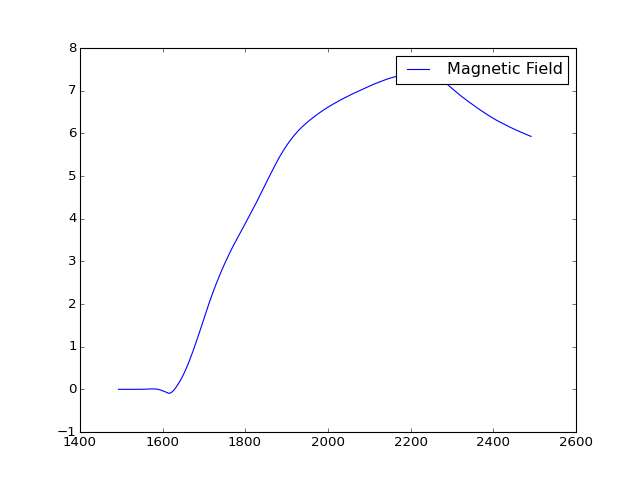

In [73]:
bd3.truncate(threshold=1,calibration=cal)
bd3.add()
bd3.subtract()
bd3.plot_estat_dBdt()
bd3.integrate()
bd3.plot_B()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


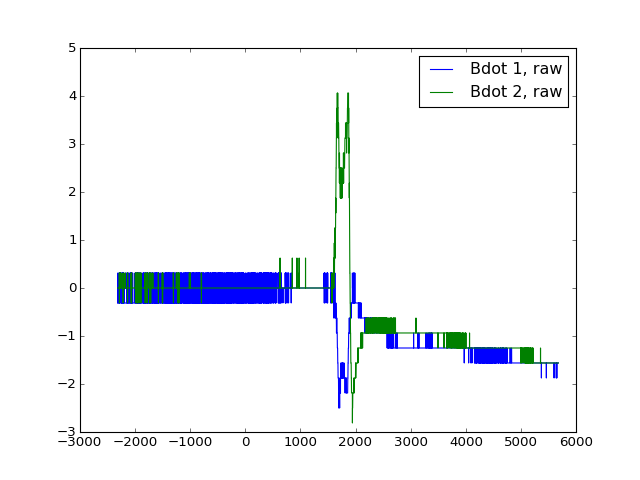

In [74]:
cal=-np.array([20/2.7, 20/2.7])*1e6 #a1 and a2
#cal=np.array([10/3.1, 10/3.1])*1e6 #b1 and b2 and d1 and d2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6 #c1 and c2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6
bd3=Bdot_pair("s0724_13 bdots.dat", bdot1='a1', bdot2='a2')
bd3.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


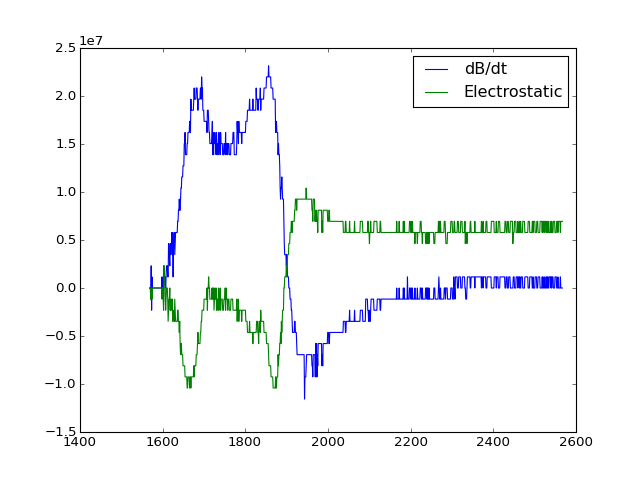

<IPython.core.display.Javascript object>


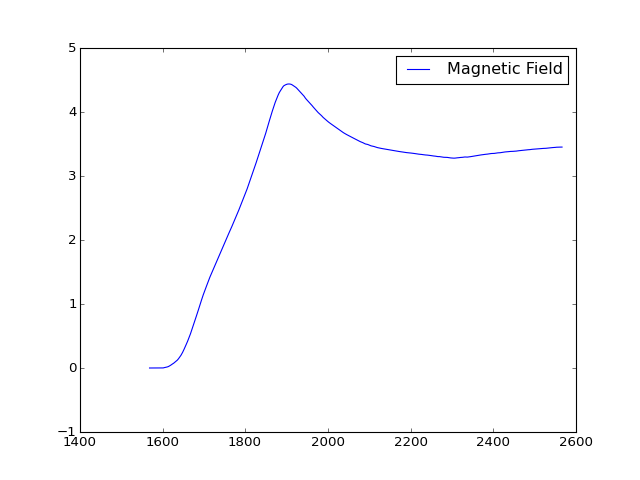

In [75]:
bd3.truncate(threshold=1,calibration=cal)
bd3.add()
bd3.subtract()
bd3.plot_estat_dBdt()
bd3.integrate()
bd3.plot_B()

## s0212_16 

In [4]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\Others"

C:\Users\jdavies\Google Drive\MAGPIE\data\Others


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


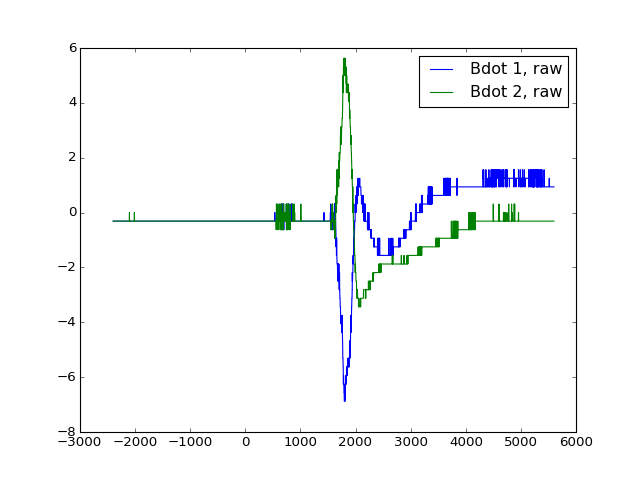

In [27]:
#cal=-np.array([20/3.1, 20/3.1])*1e6 #a1 and a2
cal=-np.array([2/0.2, 2/0.2])*1e6 #b1 and b2
#cal=np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6 #c1 and c2
#cal=np.array([2/3.1, 2/3.1])*1e6 #d1 and d2

bd=Bdot_pair("s0212_16 bdots.dat", bdot1='b1', bdot2='b2')
bd.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


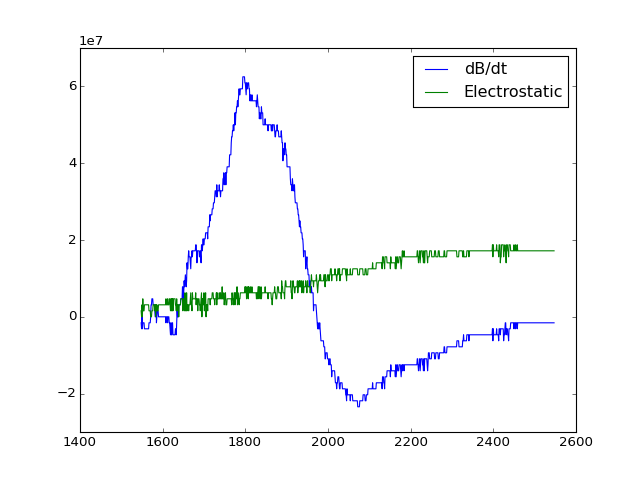

<IPython.core.display.Javascript object>


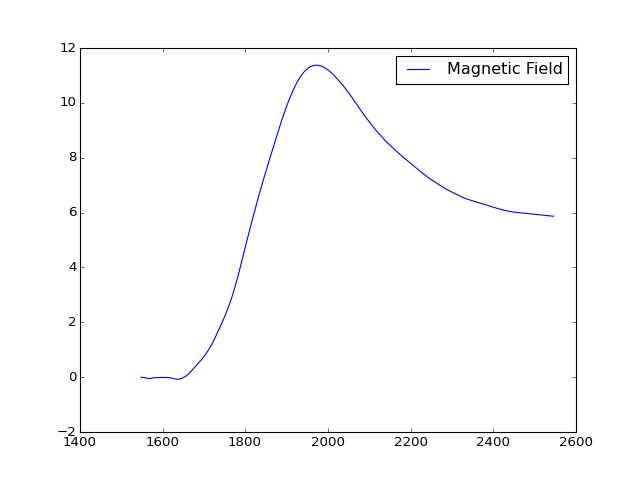

In [28]:
bd.truncate(threshold=1,calibration=cal)
bd.add()
bd.subtract()
bd.plot_estat_dBdt()
bd.integrate()
bd.plot_B()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


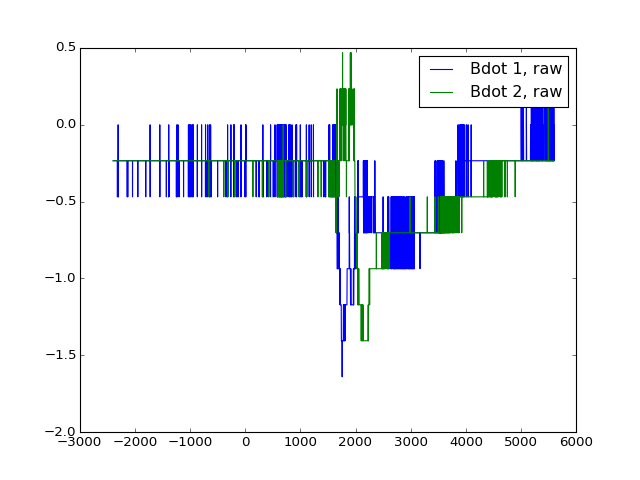

In [29]:
#cal=-np.array([20/3.1, 20/3.1])*1e6 #a1 and a2
#cal=-np.array([2/0.2, 2/0.2])*1e6 #b1 and b2
cal=-np.array([10/(np.pi/4), 10/(np.pi/4)])*1e6 #c1 and c2
#cal=np.array([2/3.1, 2/3.1])*1e6 #d1 and d2

bd2=Bdot_pair("s0212_16 bdots.dat", bdot1='c2', bdot2='c1')
bd2.plot_raw()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


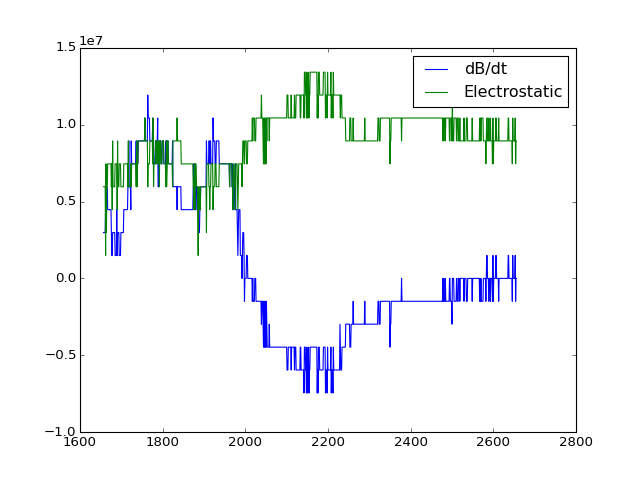

<IPython.core.display.Javascript object>


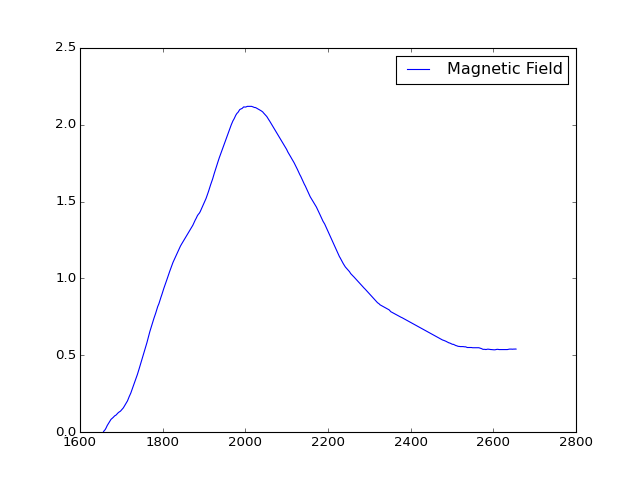

In [30]:
bd2.truncate(threshold=1.5,calibration=cal)
bd2.add()
bd2.subtract()
bd2.plot_estat_dBdt()
bd2.integrate()
bd2.plot_B()

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


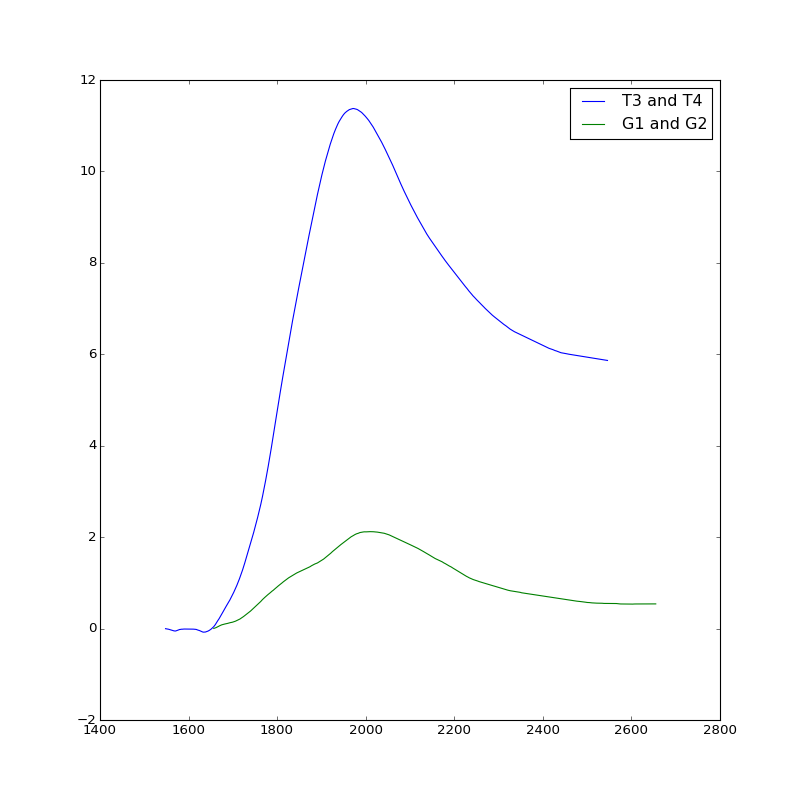

In [32]:
fig, ax=plt.subplots(figsize=(10,10))
ax.plot(bd.time_B,bd.B,label='T3 and T4' )
ax.plot(bd2.time_B,bd2.B, label='G1 and G2')
ax.legend()